In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [8]:
df = pd.read_csv("C:/Users/chand/Downloads/Titanic/Titanic-Dataset.csv", usecols=['Age','Fare','Survived','Parch','SibSp'])
df.head()
df['Family'] = df['Parch'] + df['SibSp']
df = df.drop(columns = ['Parch','SibSp'])
df.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [10]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [11]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [13]:
X_train.isnull().mean()

Age       0.196629
Fare      0.000000
Family    0.000000
dtype: float64

In [14]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

In [16]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train.tail()

,Age,Fare,Family,Age_median,Age_mean
106,21.0,7.6500,0,21.0,21.000000
270,NaN,31.0000,0,28.0,29.498846
860,41.0,14.1083,2,41.0,41.000000
435,14.0,120.0000,3,14.0,14.000000
102,21.0,77.2875,1,21.0,21.000000


In [17]:
print('Original Age Variable Variance: ',X_train['Age'].var())
print('Age Variable Variance after Median imputation : ',X_train['Age_median'].var())
print('Age Variable Variance after Mean imputation: ',X_train['Age_mean'].var())

Original Age Variable Variance:  210.2517072477438
Age Variable Variance after Median imputation :  169.20731007048096
Age Variable Variance after Mean imputation:  168.8519336687225


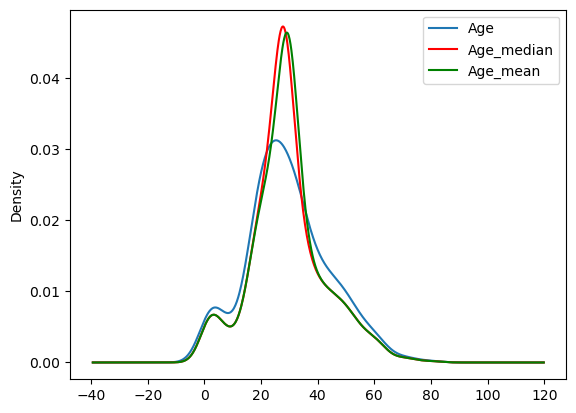

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind = 'kde', ax = ax)
X_train['Age_median'].plot(kind = 'kde', ax = ax, color = 'red')
X_train['Age_mean'].plot(kind = 'kde', ax = ax, color = 'green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc = 'best')

In [23]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean
Age,210.251707,71.580633,-6.993325,210.251707,210.251707
Fare,71.580633,2700.831981,18.495747,61.261919,57.485994
Family,-6.993325,18.495747,2.830892,-5.587710,-5.616299
Age_median,210.251707,61.261919,-5.587710,169.207310,168.851934
Age_mean,210.251707,57.485994,-5.616299,168.851934,168.851934


In [24]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean
Age,1.000000,0.088103,-0.319651,1.000000,1.000000
Fare,0.088103,1.000000,0.211525,0.090622,0.085126
Family,-0.319651,0.211525,1.000000,-0.255307,-0.256883
Age_median,1.000000,0.090622,-0.255307,1.000000,0.998949
Age_mean,1.000000,0.085126,-0.256883,0.998949,1.000000


<Axes: >

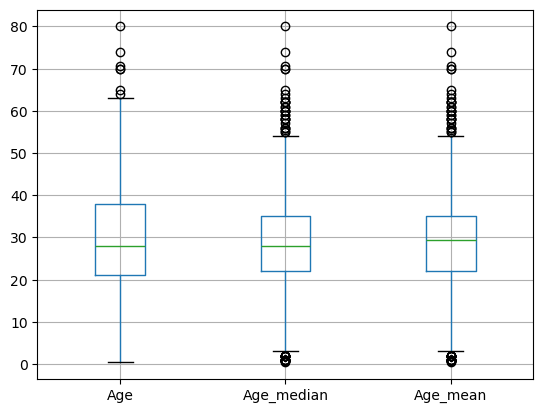

In [25]:
X_train[['Age','Age_median','Age_mean']].boxplot()

In [29]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Age'])
], remainder = 'passthrough')
trf.fit(X_train)
trf.named_transformers_['imputer1'].statistics_
trf.named_transformers_['imputer2'].statistics_

array([29.49884615])

In [39]:
X_test = trf.transform(X_train)
#